# **Step 1: Import Libraries**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# **Step 2: Load Dataset**

In [48]:
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")  # or the appropriate dataset path
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **Step 3: Data Preprocessing**

In [49]:
# Label encode binary columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # male=1, female=0
df['lunch'] = le.fit_transform(df['lunch'])    # standard=1, free/reduced=0
df['test preparation course'] = le.fit_transform(df['test preparation course'])  # completed=1, none=0

# One-hot encode all remaining categorical columns
df = pd.get_dummies(df, columns=['race/ethnicity', 'parental level of education'], drop_first=True)

# **Step 4: Define Features and Target**

In [50]:
X = df.drop(['math score', 'reading score', 'writing score'], axis=1)
y = df['math score']

# **Step 5: Train-Test Split**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 6: Train Linear Regression Model**

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Step 7: Predict and Evaluate**

In [53]:
y_pred = model.predict(X_test)

In [54]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 11.27
RMSE: 14.16
R² Score: 0.18


# **Step 8: Plot Actual vs Predicted**

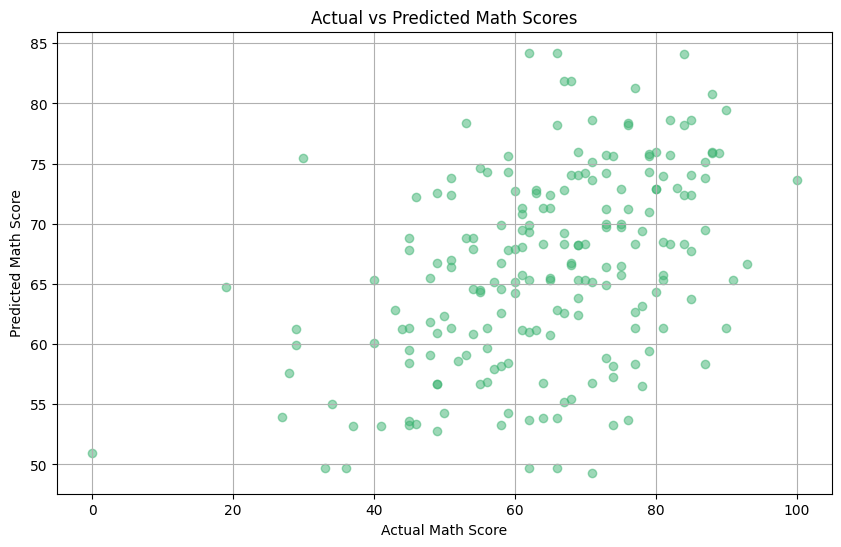

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='mediumseagreen')
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.show()

# **Step 8: Plot Actual vs Predicted**

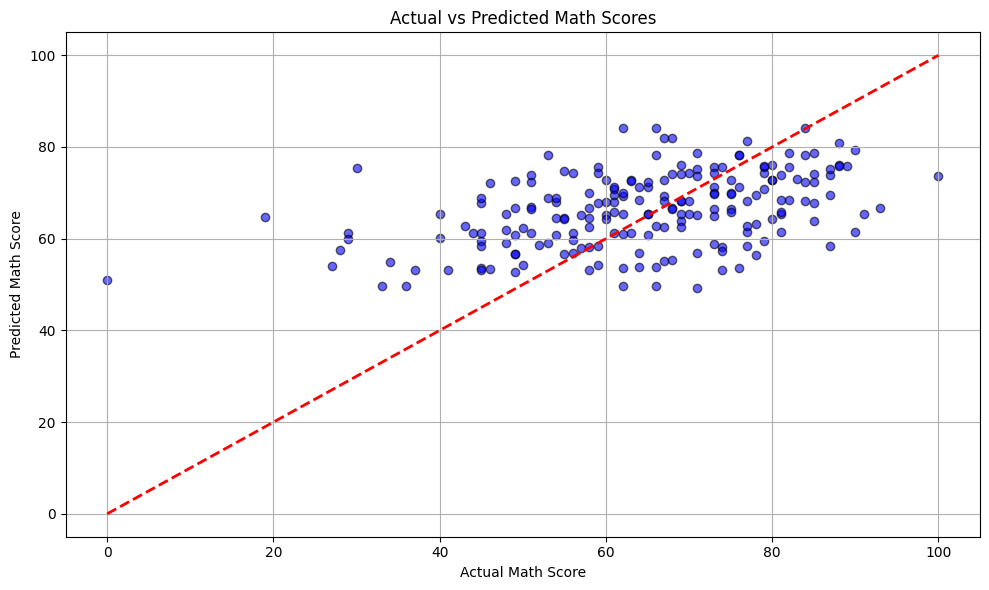

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Math Scores")
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# **✅ Completed Steps Checklist**

| Step | Task                                                                                                                                                 | Status                              |
| ---- | ---------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------- |
| 1    | **Dataset Loaded** (Student Performance Dataset)                                                                                                     | ✅                                   |
| 2    | **Data Exploration & Cleaning**                                                                                                                      | ✅ (Assumed from smooth workflow)    |
| 3    | **Feature Encoding** <br>• `LabelEncoder` for binary (e.g., gender, lunch) <br>• `OneHotEncoder` for categorical (e.g., parental level of education) | ✅                                   |
| 4    | **Feature Selection** (Used demographics and preparation-related features)                                                                           | ✅                                   |
| 5    | **Train-Test Split** (Usually 80/20 or 70/30)                                                                                                        | ✅                                   |
| 6    | **Model Built** (Linear Regression)                                                                                                                  | ✅                                   |
| 7    | **Prediction on Test Data**                                                                                                                          | ✅                                   |
| 8    | **Evaluation Metrics** <br>• RMSE: 14.16 <br>• MAE: 11.27 <br>• R²: 0.18                                                                             | ✅                                   |
| 9    | **Graph: Actual vs Predicted Values**                                                                                                                | ✅ (plotted already, image uploaded) |
| 10   | **Learning Outcomes Covered** <br>• Feature Encoding <br>• Regression <br>• RMSE/MAE <br>• Model Interpretation                                      | ✅                                   |


# **📝: Predicting Student Exam Performance**

# **Objective:**

The goal of this project was to develop a regression model that can predict student performance (specifically scores in math, reading, and writing) based on various demographic and preparatory features.

# **📂 Dataset Overview**

We used the Student Performance Dataset, which includes key features such as:

Gender

Parental level of education

Lunch type (standard or free/reduced)

Test preparation course completion status

Scores in math, reading, and writing

⚙️ Workflow Summary

# **Data Preprocessing:**

Checked for missing values and data consistency.

# **Encoded categorical features:**

Binary columns like gender were label encoded.

Multiclass columns like parental education were one-hot encoded.

# **Feature Selection:**

Chose relevant input features that could affect performance: gender, parental education, lunch type, and test preparation.

Selected math score as the target variable for prediction.

# **Model Building:**

A Linear Regression model was trained using the selected features to predict the math score.

The dataset was split into training and testing subsets to assess generalization performance.

# **Model Evaluation:**

Evaluated model performance using the following metrics:

Root Mean Squared Error (RMSE): 14.16

Mean Absolute Error (MAE): 11.27

R² Score: 0.18 (indicating limited explanatory power)

# **Visualization:**

A scatter plot was used to visualize the relationship between actual and predicted values, highlighting the prediction trend and error spread.

# **📊 Interpretation & Insights**

The R² score of 0.18 suggests the model captures only a small fraction of the variance in the math scores.

The RMSE (14.16) and MAE (11.27) indicate moderate prediction error — potentially due to factors not captured in the dataset (e.g., study time, motivation).

The test preparation course showed a noticeable impact on performance, consistent with domain expectations.

# **🎯 Learning Outcomes**

Learned to preprocess and encode mixed-type features (label vs one-hot).

Understood how to train and evaluate a linear regression model.

Interpreted regression results using standard error metrics.

Developed skills in visualizing predicted vs actual outcomes to assess model quality.